# Podstawowa klasyfikacja obrazów za pomocą sieci splotowych

Ćwiczenie omawia tematykę klasyfikacji obrazów na przykładach dwóch prostych sztucznych sieci neuronowych, sieci w pełni połączonej oraz jej rozwinięcia do postaci sieci splotowej. Zadania zostały przygotowane w formacie `ipynb` i można je uruchomić w dowolnej usłudze obsługującej ten typ plików, takiej jak na przykład [Google Colab](https://colab.research.google.com/). Zaleca się w miarę możliwości o korzystanie z karty graficznej, w celu przyspieszenia obliczeń. W wymienionej usłudze GPU dołącza się ręcznie poprzez zmianę ustawień środowiska (`Środowisko wykonawcze > Zmień typ ...`). Następnie, aby sprawdzić, czy wszystko działa poprawnie, można załadować podstawowe biblioteki potrzebne w ćwiczeniu, uruchamiając poniższy blok kodu. Jeśli w wyjściu pojawi się linia tekstu zawierająca informację o znalezionym sprzęcie, jak na przykład `[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]` to znaczy, że wszystko jest w porządku i można przejść dalej.

In [2]:
# TensorFlow i tf.keras
import tensorflow as tf
import keras
from tensorflow.keras import datasets

# Biblioteki pomocnicze
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)
print(tf.config.list_physical_devices('GPU'))

2.15.1
2.15.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Import i wstępne przygotowanie danych



In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

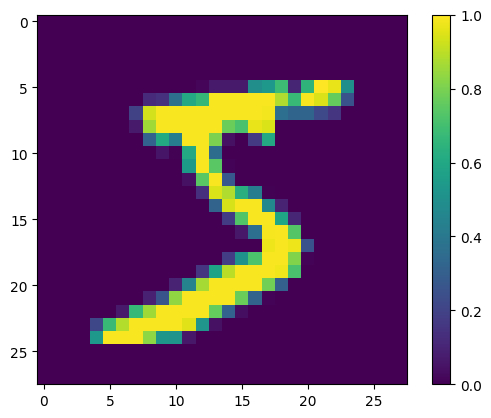

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
input_shape = train_images[0].shape
if len(input_shape) < 3:
    input_shape += tuple([1])
print(input_shape)

(28, 28, 1)


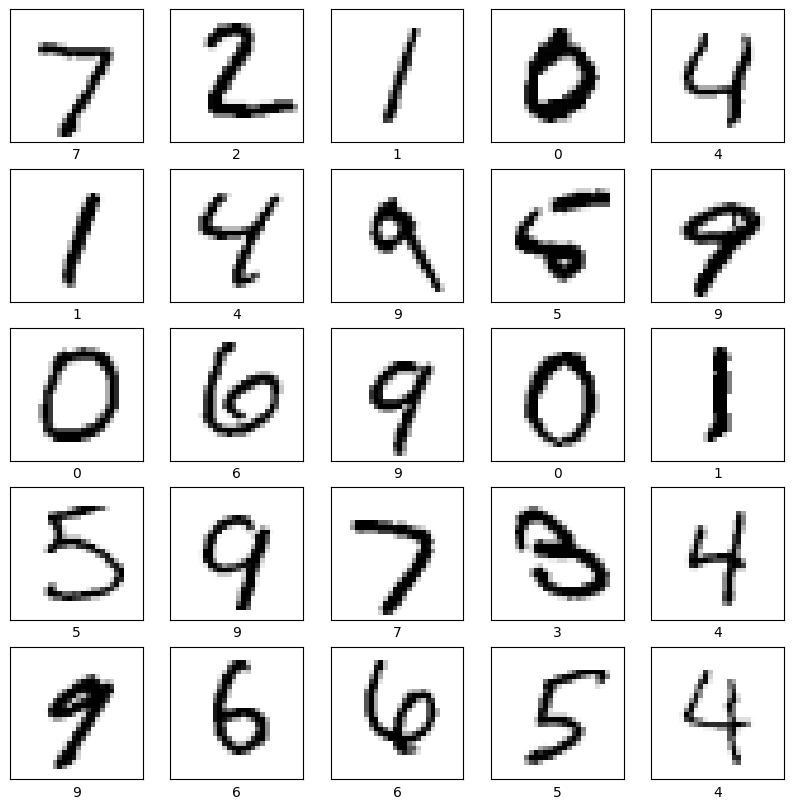

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

## Budowa modelu

In [18]:
def simple_classifier(classifier = tf.keras.Sequential([]), classifier_input = ()):
    classifier.add(tf.keras.layers.Flatten(input_shape=classifier_input))
    classifier.add(tf.keras.layers.Dense(84, activation='sigmoid'))
    classifier.add(tf.keras.layers.Dense(10, activation='softmax'))
    return classifier

def lenet_5(lenet = tf.keras.Sequential([]), classifier_input = ()):
    lenet.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=1, padding='same', activation='sigmoid', input_shape=classifier_input))
    lenet.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides = 2, padding ='valid'))
    lenet.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=1, padding='valid', activation='sigmoid'))
    lenet.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides = 2, padding ='valid'))
    lenet.add(tf.keras.layers.Conv2D(120, kernel_size=(5, 5), strides=1, padding='valid', activation='sigmoid'))
    simple_classifier(lenet)
    return lenet

model = simple_classifier(classifier_input=input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 84)                65940     
                                                                 
 dense_3 (Dense)             (None, 10)                850       
                                                                 
Total params: 66790 (260.90 KB)
Trainable params: 66790 (260.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Trening

In [20]:
model.fit(train_images, train_labels, epochs=10)

2024-04-29 17:48:16.494970: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-04-29 17:48:17.706035: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


2024-04-29 17:48:25.774572: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-29 17:48:26.595430: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5d7a04bb40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-29 17:48:26.595479: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce 940MX, Compute Capability 5.0
2024-04-29 17:48:27.065502: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-29 17:48:27.771551: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1714405708.227612   56436 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 18s 4ms/step - loss: 0.4354 - accuracy: 0.8903
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2070 - accuracy: 0.9405
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1545 - accuracy: 0.9561
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1220 - accuracy: 0.9653
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1000 - accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0842 - accuracy: 0.9758
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0718 - accuracy: 0.9801
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0618 - accuracy: 0.9824
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0540 - accuracy: 0.9850
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0474 - accura

### Ocena skuteczności

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTestowa skuteczność:', test_acc)

2024-04-28 22:56:50.483522: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 2s - loss: 0.0815 - accuracy: 0.9750 - 2s/epoch - 5ms/step

Testowa skuteczność: 0.9750000238418579


### Sprawdzenie predykcji

In [21]:
predictions = model.predict(test_images)

2024-04-29 17:52:13.514457: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2024-04-29 17:52:14.266745: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step


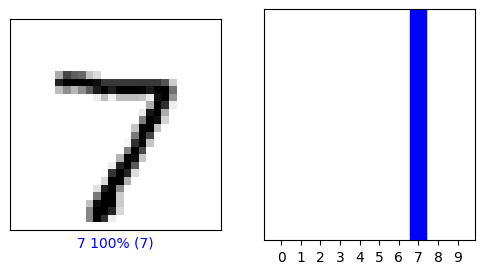

In [22]:
def plot_image(img_number, predictions_array, true_label, img):
  true_label, img = true_label[img_number], img[img_number]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(img_number, predictions_array, true_label):
  true_label = true_label[img_number]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  this_plot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  this_plot[predicted_label].set_color('red')
  this_plot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

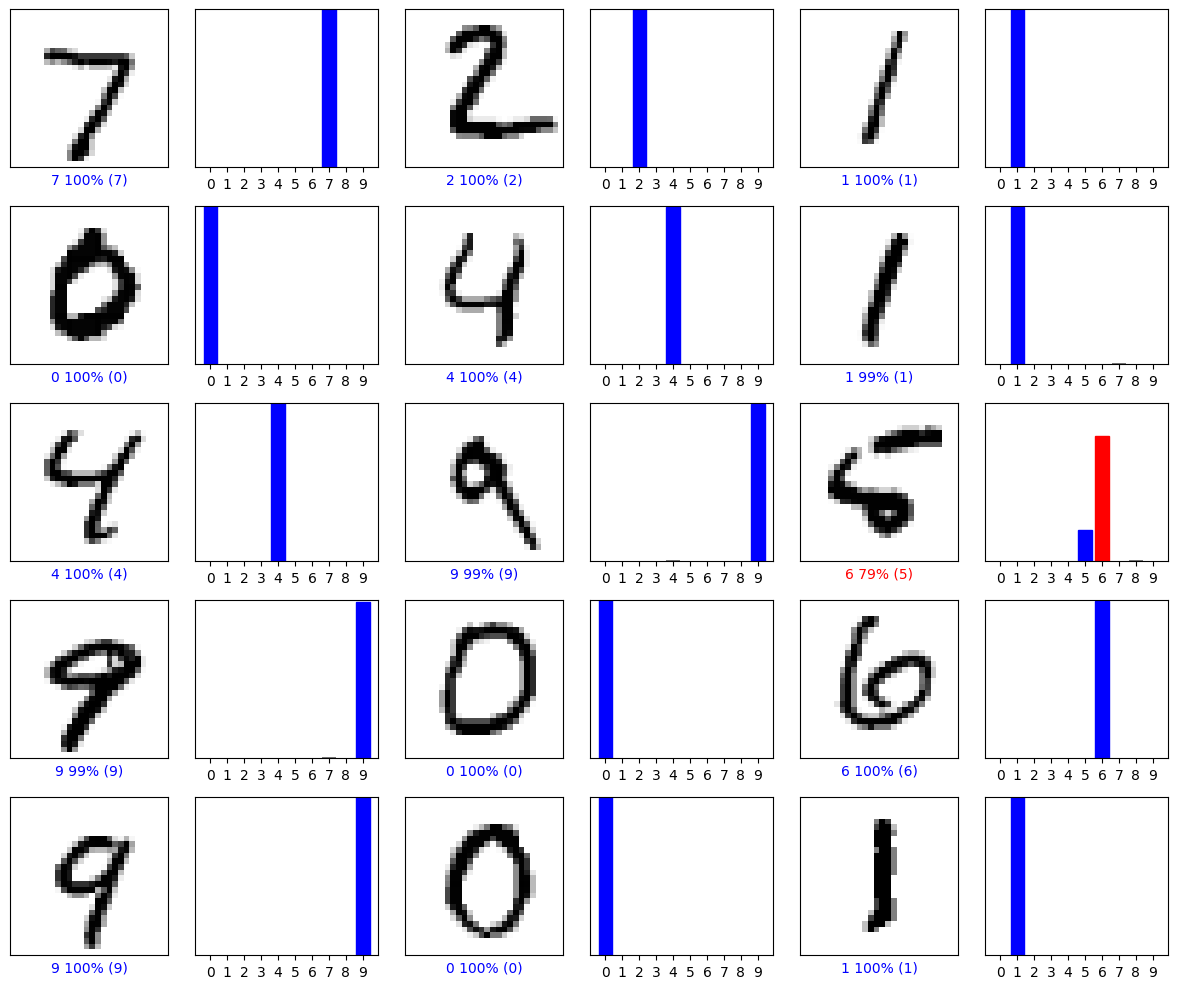

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
  
plt.tight_layout()
plt.show()

## Zadania
1. Uruchom przykładowy klasyfikator i wytrenuj go na podanym zbiorze danych (MNIST).
2. Zmodyfikuj pętlę wyświetlającą predykcję tak, aby pokazywała wyłącznie błędne przypadki. (1 pkt)
3. Uruchom klasyfikator LeNet-5, następnie powtórz kroki treningu i testów analogicznie jak w przypadku poprzedniego modelu. (1 pkt)
4. Załaduj zbiór Fashion-MNIST i ponownie sprawdź model. (1 pkt)
5. Unowocześnij sieć LeNet-5 poprzez: (1 pkt)
    - zastąp warstwy sumy uśrednionej przez sumę maksimum
    - zastąp funkcje aktywacji Sigmoid poprzez ReLU
6. Zmień rozmiary elementów sieci LeNet-5, aby osiągnęła lepszy wynik. (1 pkt)
    - dostosuj rozmiar okna splotu
    - dostosuj liczbę kanałów wyjściowych w poszczególnych warstwach
    - zmień liczbę warstw splotowych
    - zmień liczbę warstw w pełni połączonych
    - dostosuj współczynnik uczenia i pozostałe parametry treningu takie jak liczba epok